In [1]:
import numpy as np

# Define the AND gate inputs and expected outputs
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

expected_outputs = np.array([0, 0, 0, 1])  # AND gate outputs

# Initialize weights and bias
weights = np.random.rand(2)  # Two inputs, so two weights
bias = np.random.rand(1)     # Single bias
learning_rate = 0.1          # Learning rate

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron training
for epoch in range(100):  # Train for 100 epochs
    total_error = 0
    for i in range(len(inputs)):
        input_vector = inputs[i]
        expected_output = expected_outputs[i]

        # Compute the perceptron's output
        weighted_sum = np.dot(input_vector, weights) + bias
        output = step_function(weighted_sum)

        # Compute the error
        error = expected_output - output
        total_error += abs(error)

        # Update weights and bias
        weights += learning_rate * error * input_vector
        bias += learning_rate * error

    # Print progress
    if total_error == 0:
        print(f"Training complete after {epoch + 1} epochs.")
        break
else:
    print("Training did not converge.")

# Test the perceptron
print("\nTesting the perceptron:")
for i in range(len(inputs)):
    input_vector = inputs[i]
    weighted_sum = np.dot(input_vector, weights) + bias
    output = step_function(weighted_sum)
    print(f"Input: {input_vector}, Output: {output}")

Training complete after 5 epochs.

Testing the perceptron:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


In [2]:
import numpy as np

# Define the OR gate inputs and expected outputs
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

expected_outputs = np.array([0, 1, 1, 1])  # OR gate outputs

# Initialize weights and bias
weights = np.random.rand(2)  # Two inputs, so two weights
bias = np.random.rand(1)     # Single bias
learning_rate = 0.1          # Learning rate

# Activation function (step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron training
for epoch in range(100):  # Train for 100 epochs
    total_error = 0
    for i in range(len(inputs)):
        input_vector = inputs[i]
        expected_output = expected_outputs[i]

        # Compute the perceptron's output
        weighted_sum = np.dot(input_vector, weights) + bias
        output = step_function(weighted_sum)

        # Compute the error
        error = expected_output - output
        total_error += abs(error)

        # Update weights and bias
        weights += learning_rate * error * input_vector
        bias += learning_rate * error

    # Print progress
    if total_error == 0:
        print(f"Training complete after {epoch + 1} epochs.")
        break
else:
    print("Training did not converge.")

# Test the perceptron
print("\nTesting the perceptron:")
for i in range(len(inputs)):
    input_vector = inputs[i]
    weighted_sum = np.dot(input_vector, weights) + bias
    output = step_function(weighted_sum)
    print(f"Input: {input_vector}, Output: {output}")

Training complete after 2 epochs.

Testing the perceptron:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


Training AND gate:
AND gate predictions: [0 0 0 1]


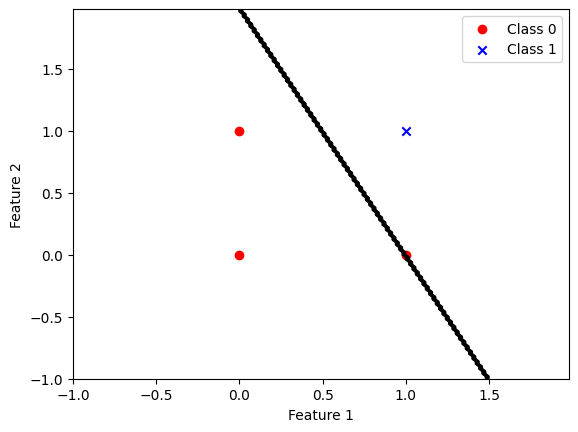


Training OR gate:
OR gate predictions: [0 1 1 1]


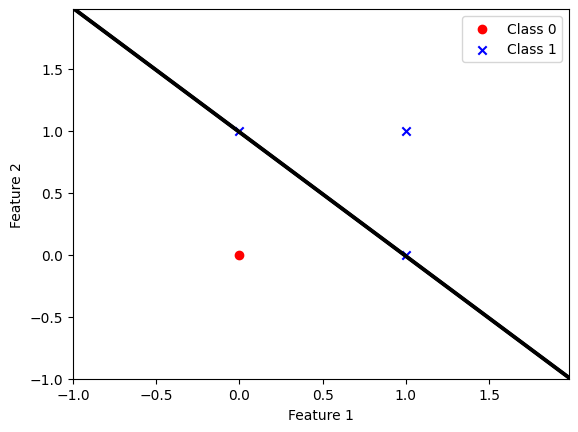


Training on custom dataset:
Accuracy: 1.0


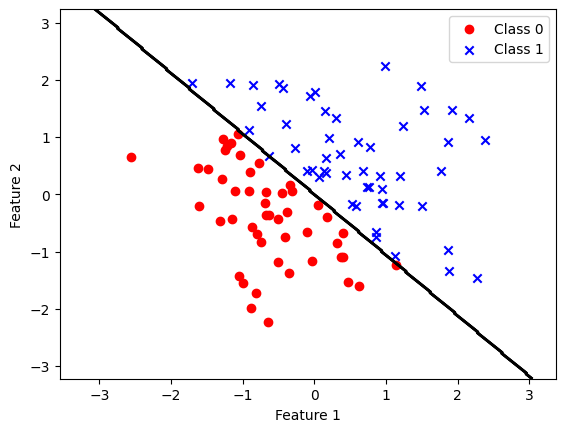

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        """Train the perceptron on input data.
        
        Parameters:
        X : array-like, shape = [n_samples, n_features]
        y : array-like, shape = [n_samples]
        """
        # Initialize weights and bias
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for _ in range(self.n_iterations):
            errors = 0
            for xi, target in zip(X, y):
                # Calculate prediction
                prediction = self.predict_one(xi)
                
                # Update weights and bias if prediction is wrong
                error = target - prediction
                if error != 0:
                    self.weights += self.learning_rate * error * xi
                    self.bias += self.learning_rate * error
                    errors += 1
            
            self.errors_.append(errors)
            # Stop if the perceptron has converged
            if errors == 0:
                break

    def predict_one(self, X):
        """Predict class for a single sample"""
        activation = np.dot(X, self.weights) + self.bias
        return 1 if activation >= 0 else 0

    def predict(self, X):
        """Predict class labels for multiple samples"""
        return np.array([self.predict_one(xi) for xi in X])

    def plot_decision_boundary(self, X, y):
        """Plot the decision boundary and data points"""
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
        
        # Plot decision boundary
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                              np.arange(x2_min, x2_max, 0.02))
        
        Z = np.array([self.predict_one(np.array([x1, x2]))
                     for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
        Z = Z.reshape(xx1.shape)
        
        plt.contour(xx1, xx2, Z, colors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# Example usage for logical gates
def demonstrate_logical_gates():
    # Training data for AND gate
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    
    # Training data for OR gate
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])
    
    # Train AND gate
    print("Training AND gate:")
    p_and = Perceptron(learning_rate=0.1, n_iterations=100)
    p_and.fit(X_and, y_and)
    print("AND gate predictions:", p_and.predict(X_and))
    p_and.plot_decision_boundary(X_and, y_and)
    
    # Train OR gate
    print("\nTraining OR gate:")
    p_or = Perceptron(learning_rate=0.1, n_iterations=100)
    p_or.fit(X_or, y_or)
    print("OR gate predictions:", p_or.predict(X_or))
    p_or.plot_decision_boundary(X_or, y_or)

# Example usage for custom dataset
def demonstrate_custom_dataset():
    # Generate a simple linearly separable dataset
    np.random.seed(0)
    X = np.random.randn(100, 2)
    y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)
    
    # Train perceptron
    p = Perceptron(learning_rate=0.1, n_iterations=100)
    p.fit(X, y)
    
    # Plot results
    print("\nTraining on custom dataset:")
    print("Accuracy:", np.mean(p.predict(X) == y))
    p.plot_decision_boundary(X, y)

if __name__ == "__main__":
    demonstrate_logical_gates()
    demonstrate_custom_dataset()

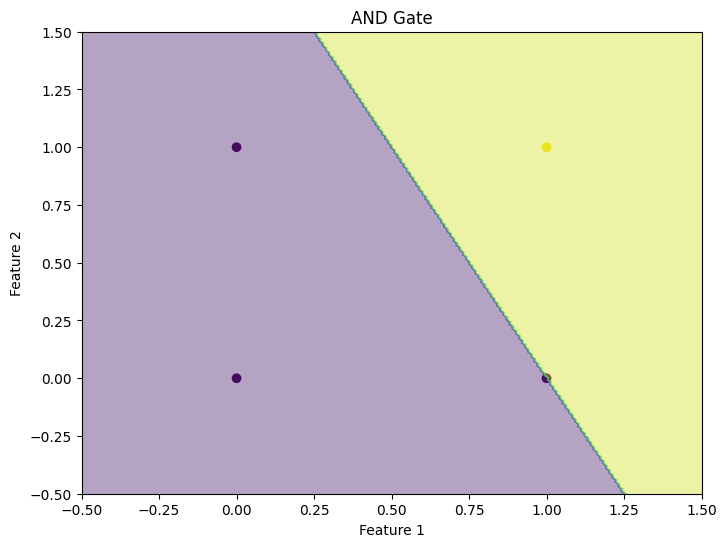

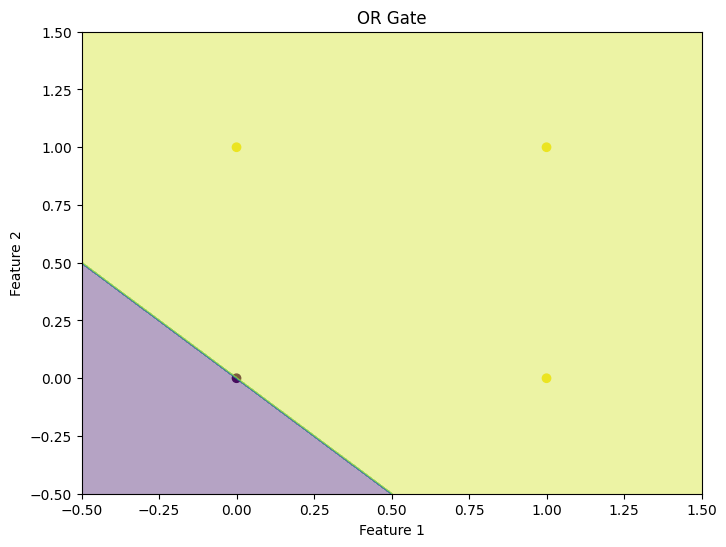

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def step_function(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.lr = lr
        self.epochs = epochs
        self.history = []

    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return step_function(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.lr * (target - prediction) * inputs
                self.weights[0] += self.lr * (target - prediction)
                self.history.append(self.weights.copy())

class MultiClassPerceptron:
    def _init_(self, input_size, num_classes, lr=0.01, epochs=100):
        self.weights = np.zeros((num_classes, input_size + 1))
        self.lr = lr
        self.epochs = epochs

    def predict(self, X):
        z = np.dot(X, self.weights[:, 1:].T) + self.weights[:, 0]
        return np.argmax(softmax(z), axis=1)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                target_onehot = np.zeros(self.weights.shape[0])
                target_onehot[target] = 1
                z = np.dot(inputs, self.weights[:, 1:].T) + self.weights[:, 0]
                predictions = softmax(z.reshape(1, -1)).flatten()
                errors = target_onehot - predictions
                self.weights[:, 1:] += self.lr * np.outer(errors, inputs)
                self.weights[:, 0] += self.lr * errors

def plot_decision_boundary(X, y, perceptron, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))
    
    Z = np.array([perceptron.predict(np.array([x1, x2])) 
                 for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

def main():
    # Logical Gates
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])
    X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_or = np.array([0, 1, 1, 1])

    for gate_name, X, y in [("AND Gate", X_and, y_and), ("OR Gate", X_or, y_or)]:
        perceptron = Perceptron(input_size=2, lr=0.1, epochs=10)
        perceptron.train(X, y)
        plot_decision_boundary(X, y, perceptron, gate_name)

   
    plt.show()

if __name__ == "__main__":
    main()

Training Binary Classification (Breast Cancer Dataset)...


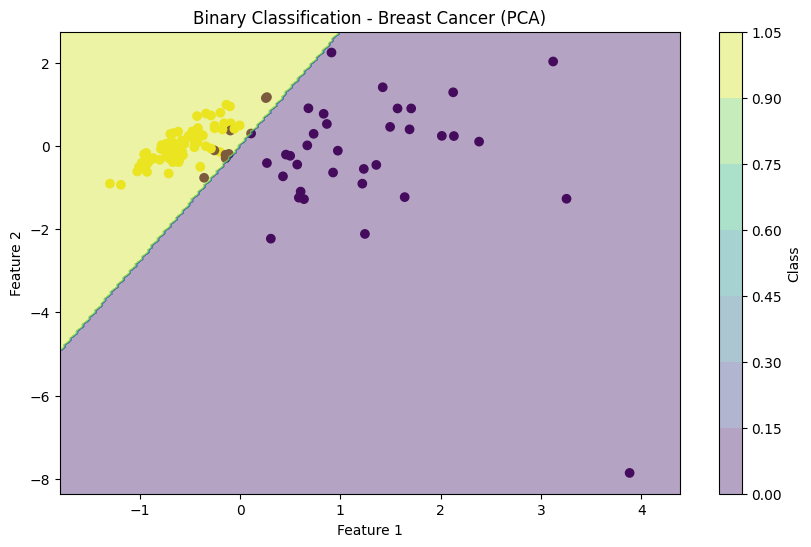


Training Multi-Class Classification (Wine Dataset)...


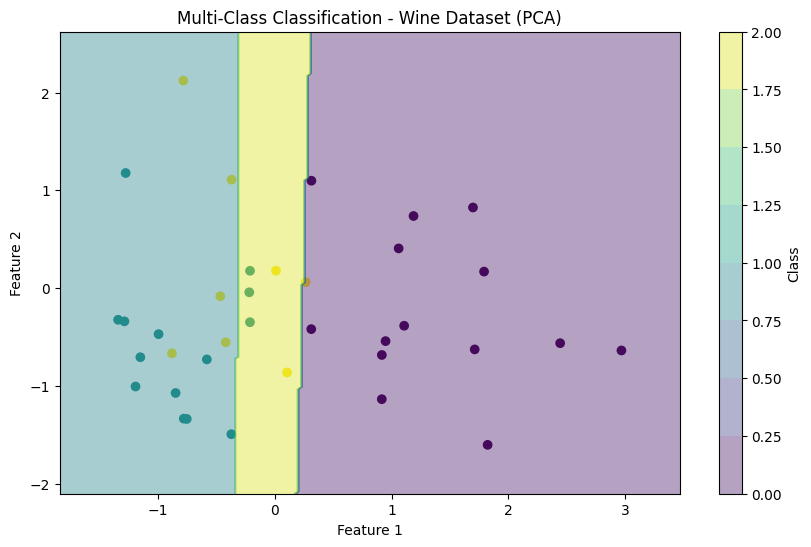

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Utility functions
def step_function(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    if len(x.shape) == 1:
        x = x.reshape(1, -1)
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Perceptron classes
class Perceptron:
    def __init__(self, input_size, lr=0.01, epochs=100):  # Fixed __init__
        self.weights = np.zeros(input_size + 1)
        self.lr = lr
        self.epochs = epochs

    def predict(self, x):
        z = np.dot(x, self.weights[1:]) + self.weights[0]
        return step_function(z)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.lr * (target - prediction) * inputs
                self.weights[0] += self.lr * (target - prediction)


class MultiClassPerceptron:
    def __init__(self, input_size, num_classes, lr=0.01, epochs=100):  # Fixed __init__
        self.weights = np.zeros((num_classes, input_size + 1))
        self.lr = lr
        self.epochs = epochs

    def predict_one(self, x):
        z = np.dot(self.weights[:, 1:], x) + self.weights[:, 0]
        probs = softmax(z)
        return np.argmax(probs)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, target in zip(X, y):
                z = np.dot(self.weights[:, 1:], inputs) + self.weights[:, 0]
                probs = softmax(z).flatten()
                target_dist = np.zeros_like(probs)
                target_dist[target] = 1
                error = target_dist - probs
                self.weights[:, 1:] += self.lr * np.outer(error, inputs)
                self.weights[:, 0] += self.lr * error


# Visualization function
def plot_decision_boundary(X, y, perceptron, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = perceptron.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(label='Class')
    plt.show()

def main():
    # Binary Classification - Breast Cancer Dataset
    print("Training Binary Classification (Breast Cancer Dataset)...")
    data = load_breast_cancer()
    X, y = data.data, data.target
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    scaler = StandardScaler()
    X_pca = scaler.fit_transform(X_pca)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    binary_perceptron = Perceptron(input_size=X_train.shape[1], lr=0.01, epochs=100)
    binary_perceptron.train(X_train, y_train)
    plot_decision_boundary(X_test, y_test, binary_perceptron, "Binary Classification - Breast Cancer (PCA)")

    # Multi-Class Classification - Wine Dataset
    print("\nTraining Multi-Class Classification (Wine Dataset)...")
    wine = load_wine()
    X, y = wine.data, wine.target
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    X_pca = scaler.fit_transform(X_pca)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    multi_perceptron = MultiClassPerceptron(input_size=X_train.shape[1], num_classes=3, lr=0.01, epochs=100)
    multi_perceptron.train(X_train, y_train)
    plot_decision_boundary(X_test, y_test, multi_perceptron, "Multi-Class Classification - Wine Dataset (PCA)")

if __name__ == "__main__":
    main()

In [6]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define the XOR input and output
# Inputs: XOR truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Outputs: XOR output
y = np.array([[0], [1], [1], [0]])

# Create a Sequential model
model = Sequential()

# Add layers to the model
# Input layer with 2 inputs and a hidden layer with 4 neurons
model.add(Dense(4, input_dim=2, activation='relu'))
# Output layer with 1 neuron (binary output)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# Using binary crossentropy as the loss function for binary classification
model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Training for 500 epochs
history = model.fit(X, y, epochs=500, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Predict the XOR output
predictions = model.predict(X)
print("\nPredictions:")
for i, prediction in enumerate(predictions):
    print(f"Input: {X[i]}, Predicted Output: {prediction[0]:.4f}, Rounded: {round(prediction[0])}")


c:\Users\eakes\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Accuracy: 50.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

Predictions:
Input: [0 0], Predicted Output: 0.4897, Rounded: 0
Input: [0 1], Predicted Output: 0.5039, Rounded: 1
Input: [1 0], Predicted Output: 0.4945, Rounded: 0
Input: [1 1], Predicted Output: 0.5087, Rounded: 1


Epoch 0, Loss: 0.2500
Epoch 1000, Loss: 0.2500
Epoch 2000, Loss: 0.2500
Epoch 3000, Loss: 0.2500
Epoch 4000, Loss: 0.2500
Epoch 5000, Loss: 0.2500
Epoch 6000, Loss: 0.2500
Epoch 7000, Loss: 0.2500
Epoch 8000, Loss: 0.2500
Epoch 9000, Loss: 0.2500

Final predictions:
[[0.4999959 ]
 [0.49999832]
 [0.50000168]
 [0.5000041 ]]


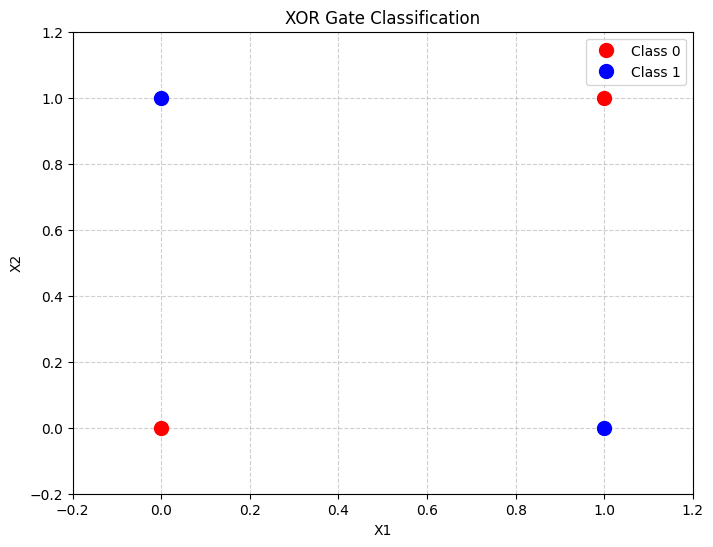

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class MLP:
    def __init__(self, input_size, hidden_size):  # Corrected method name
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        # Backward propagation
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update parameters
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

# Training data for XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create and train the model
model = MLP(input_size=2, hidden_size=4)

# Training
epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    # Forward pass
    output = model.forward(X)
    
    # Backward pass
    model.backward(X, y, learning_rate)
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean(np.square(output - y))
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

# Plot the XOR points and decision boundary
def plot_xor():
    plt.figure(figsize=(8, 6))
    
    # Plot the training points
    for i in range(len(X)):
        if y[i] == 0:
            plt.plot(X[i, 0], X[i, 1], 'ro', markersize=10, label='Class 0' if i == 0 else "")
        else:
            plt.plot(X[i, 0], X[i, 1], 'bo', markersize=10, label='Class 1' if i == 1 else "")
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Add labels and title
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('XOR Gate Classification')
    
    # Set axis limits
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    
    # Add legend
    plt.legend()
    
    plt.show()

# Test the model
test_output = model.forward(X)
print("\nFinal predictions:")
print(test_output)

# Plot the XOR points
plot_xor()


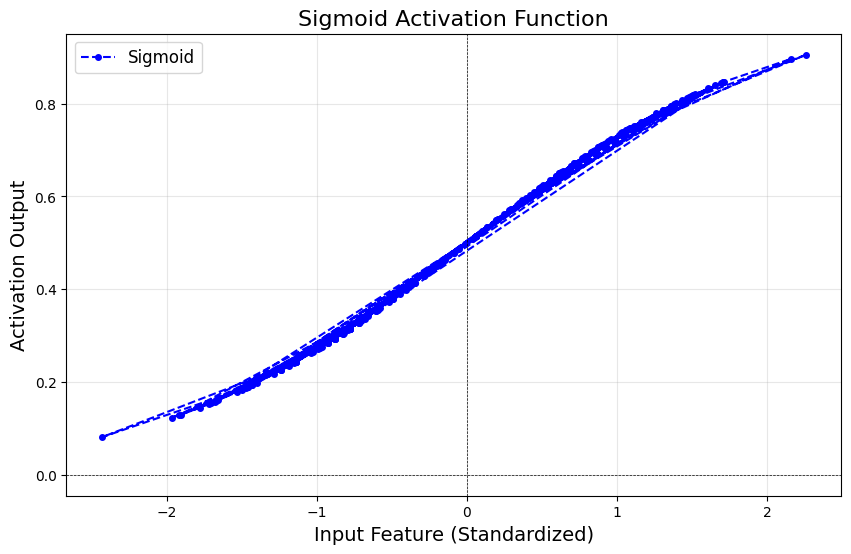

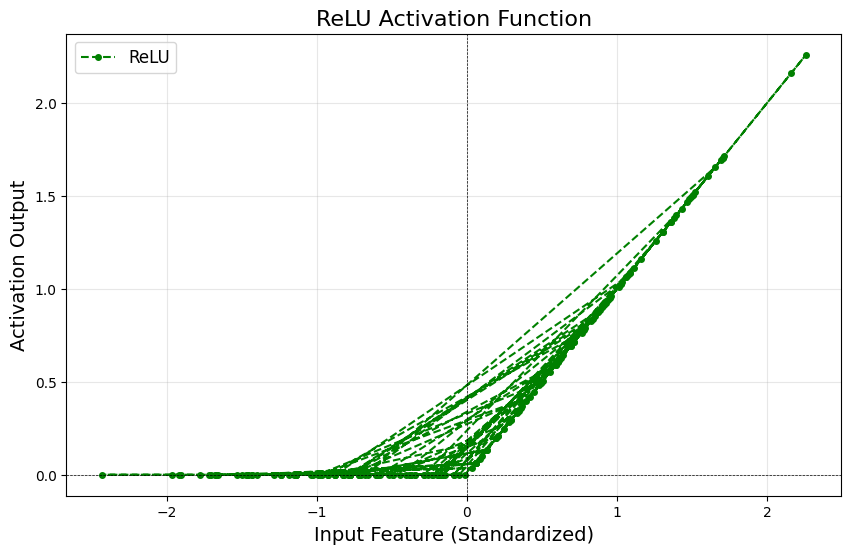

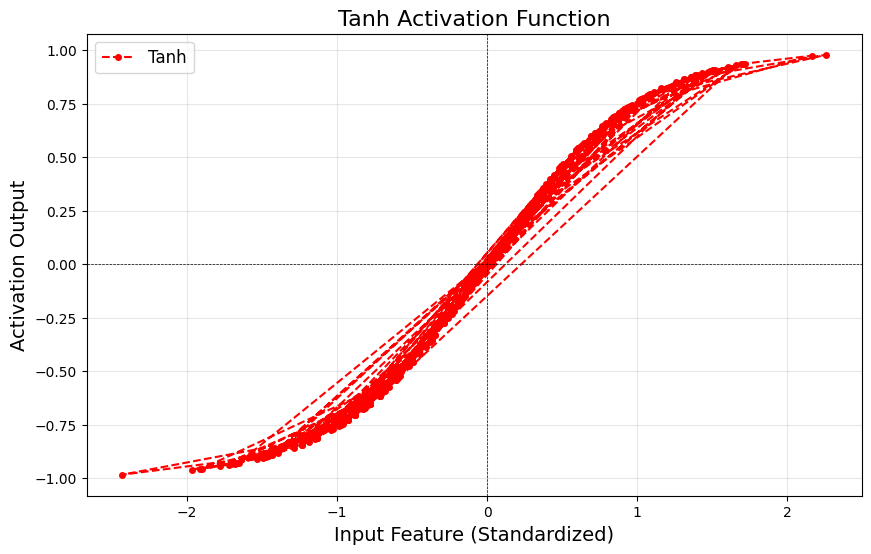

In [9]:
#Implement Sigmoid, ReLU, and Tanh activation functions.
#Compare their outputs on a dataset.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Tanh function
def tanh(x):
    return np.tanh(x)

# Apply activation functions to the first feature of the dataset
feature = X_scaled[:, 0]  # Choose the first feature for comparison

sigmoid_output = sigmoid(feature)
relu_output = relu(feature)
tanh_output = tanh(feature)

# Plot Sigmoid
plt.figure(figsize=(10, 6))
plt.plot(feature, sigmoid_output, label='Sigmoid', color='blue', marker='o', linestyle='--', markersize=4)
plt.title('Sigmoid Activation Function', fontsize=16)
plt.xlabel('Input Feature (Standardized)', fontsize=14)
plt.ylabel('Activation Output', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plot ReLU
plt.figure(figsize=(10, 6))
plt.plot(feature, relu_output, label='ReLU', color='green', marker='o', linestyle='--', markersize=4)
plt.title('ReLU Activation Function', fontsize=16)
plt.xlabel('Input Feature (Standardized)', fontsize=14)
plt.ylabel('Activation Output', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plot Tanh
plt.figure(figsize=(10, 6))
plt.plot(feature, tanh_output, label='Tanh', color='red', marker='o', linestyle='--', markersize=4)
plt.title('Tanh Activation Function', fontsize=16)
plt.xlabel('Input Feature (Standardized)', fontsize=14)
plt.ylabel('Activation Output', fontsize=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [10]:
#Implement forward propagation and backpropagation manually for a 2-layer neural network.

import numpy as np

# Sigmoid function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Mean Squared Error loss
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Data (X: input, y: target)
X = np.array([[0.1, 0.2], [0.2, 0.1], [0.3, 0.3], [0.4, 0.5]])  # 4 samples, 2 features
y = np.array([[0], [1], [0], [1]])  # Binary targets

# Neural network parameters
np.random.seed(42)
n_input = X.shape[1]   # Number of input features
n_hidden = 3           # Number of hidden neurons
n_output = 1           # Output size

# Initialize weights and biases
W1 = np.random.randn(n_input, n_hidden) * 0.01
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output) * 0.01
b2 = np.zeros((1, n_output))

# Learning rate
learning_rate = 0.01

# Forward and Backpropagation
for epoch in range(1000):  # Number of iterations
    # Forward Propagation
    Z1 = np.dot(X, W1) + b1          # Linear for hidden layer
    A1 = sigmoid(Z1)                # Activation for hidden layer
    Z2 = np.dot(A1, W2) + b2        # Linear for output layer
    A2 = sigmoid(Z2)                # Activation for output layer
    
    # Compute loss
    loss = compute_loss(y, A2)
    
    # Backpropagation
    dZ2 = A2 - y                    # Loss gradient w.r.t. output
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]
    
    dA1 = np.dot(dZ2, W2.T)         # Gradient w.r.t. hidden activations
    dZ1 = dA1 * sigmoid_derivative(Z1)  # Gradient w.r.t. hidden pre-activations
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final results
print("Final weights and biases:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)

Epoch 0, Loss: 0.2500
Epoch 100, Loss: 0.2500
Epoch 200, Loss: 0.2500
Epoch 300, Loss: 0.2500
Epoch 400, Loss: 0.2500
Epoch 500, Loss: 0.2500
Epoch 600, Loss: 0.2500
Epoch 700, Loss: 0.2500
Epoch 800, Loss: 0.2500
Epoch 900, Loss: 0.2500
Final weights and biases:
W1: [[ 0.0058412  -0.00104256  0.00606273]
 [ 0.01566427 -0.00217279 -0.0025472 ]]
b1: [[-2.02063633e-05 -8.64614132e-06  8.28188874e-06]]
W2: [[ 0.01384421]
 [ 0.00476906]
 [-0.00714091]]
b2: [[-0.00552233]]
